In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau

## Data Preprocessing

In [3]:
df = pd.read_csv('sp500_companies.csv')

In [5]:
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,406.22,3018393387008,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.063713
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,170.73,2636395315200,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.055649
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,875.28,2188200116224,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.046189
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,175.35,1821430644736,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038447
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,136.29,1688632950784,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.035644


In [4]:
num_rows = df.shape[0]
print(num_rows)

503


In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Exchange - 0.0%
Symbol - 0.0%
Shortname - 0.0%
Longname - 0.0%
Sector - 0.0%
Industry - 0.0%
Currentprice - 0.0%
Marketcap - 0.0%
Ebitda - 0.05765407554671968%
Revenuegrowth - 0.0019880715705765406%
City - 0.0%
State - 0.039761431411530816%
Country - 0.0%
Fulltimeemployees - 0.019880715705765408%
Longbusinesssummary - 0.0%
Weight - 0.0%


In [6]:
original = df
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        502 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

In [7]:
df = df.drop_duplicates(subset=['Longname'], keep='first')
df = df.dropna()

## Descriptive Analysis (Stock Prices)

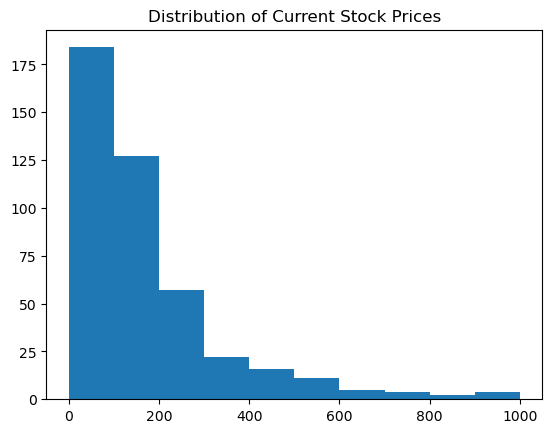

In [8]:
plt.hist(df['Currentprice'], range=(0, 1000))
plt.title('Distribution of Current Stock Prices')
plt.show()

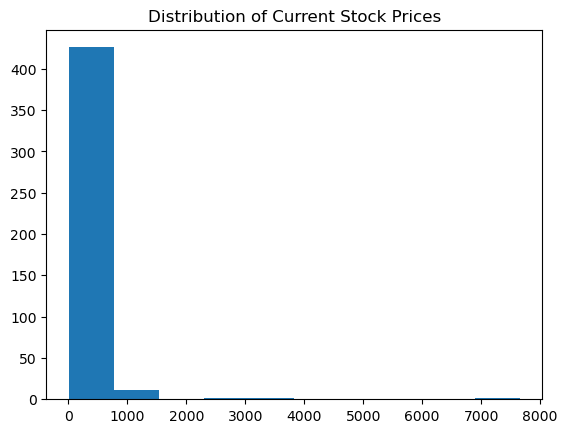

In [9]:
plt.hist(df['Currentprice'])
plt.title('Distribution of Current Stock Prices')
plt.show()

In [10]:
grouped = df.groupby('Sector')
sector_grouped = grouped['Currentprice']
sector_mean = sector_grouped.mean().sort_values(ascending = False)
print(sector_mean)

Sector
Consumer Cyclical         473.862115
Technology                271.554925
Healthcare                245.401129
Industrials               230.424118
Financial Services        205.623636
Basic Materials           147.797143
Real Estate               134.909333
Communication Services    132.275263
Consumer Defensive        107.460278
Energy                     92.111304
Utilities                  67.302667
Name: Currentprice, dtype: float64


## Descriptive Analysis (Marketcap and Weight)

In [11]:
grouped = df.groupby('Sector')
sector_grouped = grouped['Marketcap']
sector_mean = sector_grouped.mean().sort_values(ascending = False)
print(sector_mean)

Sector
Communication Services    2.272091e+11
Technology                1.958920e+11
Consumer Cyclical         9.064271e+10
Healthcare                8.805499e+10
Financial Services        8.281085e+10
Consumer Defensive        7.934027e+10
Energy                    7.182722e+10
Industrials               5.050966e+10
Real Estate               3.432341e+10
Basic Materials           3.365967e+10
Utilities                 3.157316e+10
Name: Marketcap, dtype: float64


In [12]:
grouped = df.groupby('Sector')
critic_grouped = grouped['Weight']
critic_mean = critic_grouped.mean().sort_values(ascending = False)
print(critic_mean)

Sector
Communication Services    0.004796
Technology                0.004135
Consumer Cyclical         0.001913
Healthcare                0.001859
Financial Services        0.001748
Consumer Defensive        0.001675
Energy                    0.001516
Industrials               0.001066
Real Estate               0.000725
Basic Materials           0.000710
Utilities                 0.000666
Name: Weight, dtype: float64


In [13]:
tech_stocks = df[df['Sector'] == 'Technology']

In [14]:
# Sort by MarketCap in descending order and select the top 10
top_tech_stocks = tech_stocks.sort_values(by='Marketcap', ascending=False).head(10)[['Longname', 'Weight']]



In [15]:
print(top_tech_stocks)


                        Longname    Weight
0          Microsoft Corporation  0.063713
1                     Apple Inc.  0.055649
2             NVIDIA Corporation  0.046189
9                  Broadcom Inc.  0.012802
20  Advanced Micro Devices, Inc.  0.007073
24            Oracle Corporation  0.006523
25              Salesforce, Inc.  0.006251
30                    Adobe Inc.  0.005270
39           Cisco Systems, Inc.  0.004231
41         QUALCOMM Incorporated  0.004018


In [16]:
comm_stocks = df[df['Sector'] == 'Communication Services']

In [17]:
# Sort by MarketCap in descending order and select the top 10
top_comm_stocks = comm_stocks.sort_values(by='Marketcap', ascending=False).head(10)[['Longname', 'Weight']]

In [18]:
print(top_comm_stocks)


                         Longname    Weight
4                   Alphabet Inc.  0.035644
6            Meta Platforms, Inc.  0.027227
28                  Netflix, Inc.  0.005525
38        The Walt Disney Company  0.004271
40              T-Mobile US, Inc.  0.004108
49            Comcast Corporation  0.003570
50    Verizon Communications Inc.  0.003506
73                      AT&T Inc.  0.002597
218  Charter Communications, Inc.  0.000870
244          Electronic Arts Inc.  0.000763


## Correlation Analysis

In [19]:
df_numerical = df.select_dtypes(include=[np.number])

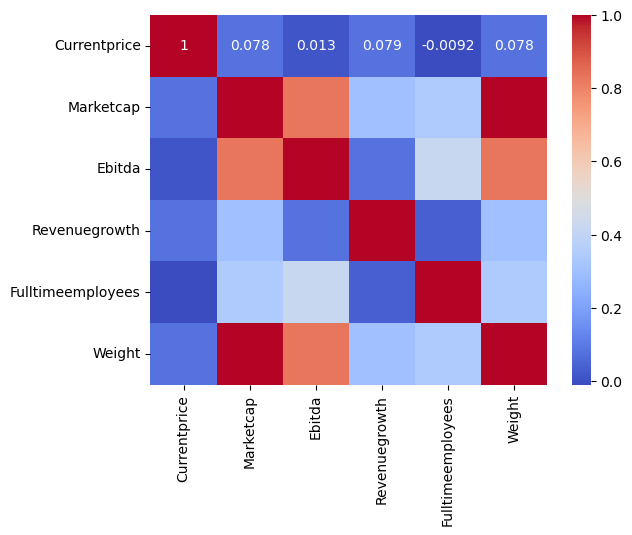

In [20]:
corr = df_numerical.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [21]:
pearson_coeff, p_value = pearsonr(df['Marketcap'], df['Ebitda'])
print(f"Pearson's Correlation Coefficient: {pearson_coeff}, P-value: {p_value}")

Pearson's Correlation Coefficient: 0.8303060620856115, P-value: 1.5721531564487446e-113


In [22]:
pearson_coeff, p_value = pearsonr(df['Weight'], df['Ebitda'])
print(f"Pearson's Correlation Coefficient: {pearson_coeff}, P-value: {p_value}")

Pearson's Correlation Coefficient: 0.8303060620856124, P-value: 1.5721531564471266e-113


In [23]:
pearson_coeff, p_value = pearsonr(df['Weight'], df['Marketcap'])
print(f"Pearson's Correlation Coefficient: {pearson_coeff}, P-value: {p_value}")

Pearson's Correlation Coefficient: 1.0, P-value: 0.0


## Cross-Sectional Regression (Stock Prices)

In [24]:
Y = df['Currentprice']
X = df[['Ebitda', 'Fulltimeemployees', 'Revenuegrowth']]

In [25]:
# Adding a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Currentprice   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9584
Date:                Sun, 21 Apr 2024   Prob (F-statistic):              0.412
Time:                        22:05:37   Log-Likelihood:                -3340.5
No. Observations:                 441   AIC:                             6689.
Df Residuals:                     437   BIC:                             6705.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               215.1667     25.62

In [26]:
Y = df['Currentprice']
X = df[['Revenuegrowth']]

In [27]:
# Adding a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Currentprice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.749
Date:                Sun, 21 Apr 2024   Prob (F-statistic):             0.0980
Time:                        22:05:37   Log-Likelihood:                -3340.6
No. Observations:                 441   AIC:                             6685.
Df Residuals:                     439   BIC:                             6693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           214.9204     22.981      9.352

In [28]:
Y = df['Marketcap']
X = df[['Ebitda', 'Fulltimeemployees', 'Revenuegrowth']]

In [29]:
# Adding a constant (intercept) to the model
X = sm.add_constant(X)

# Square root transformation
Y = np.sqrt(Y)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Marketcap   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     392.3
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.52e-123
Time:                        22:05:37   Log-Likelihood:                -5703.1
No. Observations:                 441   AIC:                         1.141e+04
Df Residuals:                     437   BIC:                         1.143e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.532e+05   5435.99

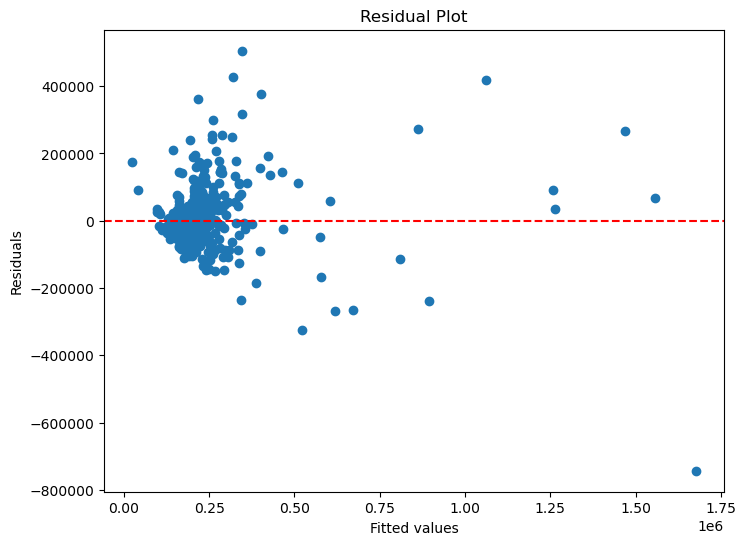

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=model.fittedvalues, y=model.resid)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.show()

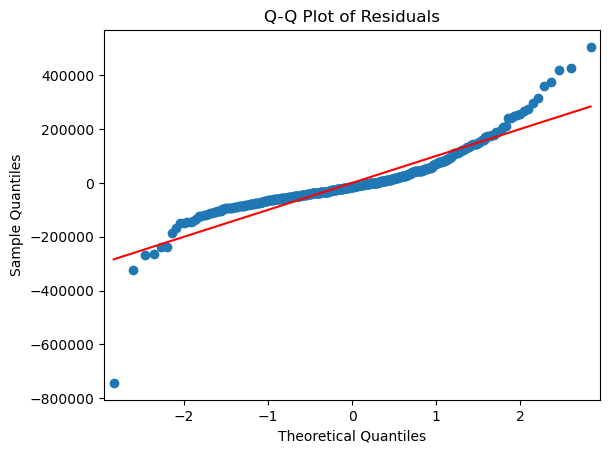

In [31]:
fig = sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [32]:
# Assume 'model' is the result of sm.OLS(Y, X).fit()
p_values = model.pvalues

# Print each p-value with high precision
for var, p in p_values.items():
     print(f"{var}: p-value = {p:.2e}")  # Adjust formatting as needed

const: p-value = 2.41e-100
Ebitda: p-value = 4.23e-100
Fulltimeemployees: p-value = 3.39e-03
Revenuegrowth: p-value = 1.69e-16


In [33]:
Y = df['Marketcap']
X = df[['Ebitda', 'Revenuegrowth']]

In [34]:
# Adding a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Marketcap   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     634.9
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          3.82e-130
Time:                        22:05:38   Log-Likelihood:                -11924.
No. Observations:                 441   AIC:                         2.385e+04
Df Residuals:                     438   BIC:                         2.387e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.899e+10   7.12e+09     -2.667